In [2]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats


In [4]:
def find_mode_point(data, num_bins=1000):

    # Using guissian kernel
    kde = stats.gaussian_kde(data)
    data_kde = kde.resample()[0]

    # Discretize the data into bins
    bins = np.linspace(min(data_kde), max(data_kde), num_bins)
    digitized = np.digitize(data_kde, bins)

    # Find the mode of the digitized data
    mode_bin = stats.mode(digitized)

    # Find the midpoint of the mode bin
    mode_point = (bins[mode_bin.mode - 1] + bins[mode_bin.mode]) / 2

    return mode_point

In [3]:
simNumber = 11 
parent_dir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/simulation/'
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
# delcare a array for saving mean parameters
subs_para_mean = np.zeros([len(subList), 2, 2, 4])
# delcare a array for saving mode parameters
subs_para_mode = np.zeros([len(subList), 2, 2, 4])
# loop over list of participants
for i, subName in enumerate(subList):
    for session in [1,2]: 
        pickelDir = parent_dir + str(simNumber) + '/' + subName + '/sess-' + str(session) + '_RL_condition.pkl'
        """Loading the pickle file of model fit from the subject directory"""
        loadPkl = utils.load_pickle(load_path=pickelDir)
        fit = loadPkl['fit']   
        # mean of estimated paraemter  for Action and color Conditions
        subs_para_mean[i, 0, session-1] = np.array([fit['alphaAct'][0].mean(), fit['alphaClr'][0].mean(), fit['weightAct'][0].mean(), fit['sensitivity'][0].mean()])
        subs_para_mean[i, 1, session-1] = np.array([fit['alphaAct'][1].mean(), fit['alphaClr'][1].mean(), fit['weightAct'][1].mean(), fit['sensitivity'][1].mean()])
        # Mode of estimated paraemter  for Action and color Conditions
        subs_para_mode[i, 0, session-1] = np.array([find_mode_point(fit['alphaAct'][0]), find_mode_point(fit['alphaClr'][0]), find_mode_point(fit['weightAct'][0]), find_mode_point(fit['sensitivity'][0])])
        subs_para_mode[i, 1, session-1] = np.array([find_mode_point(fit['alphaAct'][1]), find_mode_point(fit['alphaClr'][1]), find_mode_point(fit['weightAct'][1]), find_mode_point(fit['sensitivity'][1])])


In [4]:
# the grand truth parameters
subs_grand_truth = np.zeros([len(subList), 2, 2, 4])
# loop over list of participants
for i, subName in enumerate(subList):
    for session in [1,2]:
        for cond, condition in enumerate(['Act', 'Stim']): 
            dirc = parent_dir + str(simNumber) + '/' + subName +'/' + subName + '-simulated-task-design-true-param.csv'
            simulated_data = pd.read_csv(dirc)
            simulated_data_chunck = simulated_data[(simulated_data['session'] == session) & (simulated_data['block'] == condition)]
            subs_grand_truth[i, cond, session-1] = np.array([simulated_data_chunck['alphaAct'].unique()[0],
                                                             simulated_data_chunck['alphaClr'].unique()[0], 
                                                             simulated_data_chunck['weightAct'].unique()[0],
                                                             simulated_data_chunck['beta'].unique()[0]])

In [8]:
np.corrcoef(subs_grand_truth[:, :,:,1].flatten(), subs_para_mean[:, :,:,1].flatten())

array([[1.        , 0.36554857],
       [0.36554857, 1.        ]])

(0.0, 0.15)

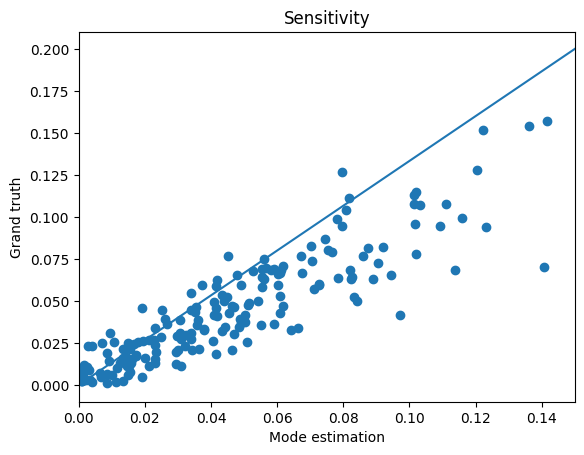

In [11]:
plt.scatter(subs_para_mode[:,:,:, 3].flatten(),subs_grand_truth[:,:,:, 3].flatten())
plt.plot([.0,.15], [.0,.2])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Sensitivity')
plt.xlim(0, .15)

(0.0, 0.15)

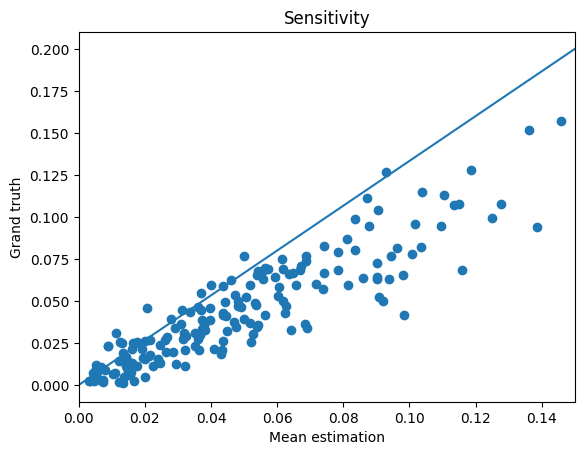

In [6]:
plt.scatter(subs_para_mean[:,:,:, 3].flatten(),subs_grand_truth[:,:,:, 3].flatten())
plt.plot([.0,.15], [.0,.2])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Sensitivity')
plt.xlim(0, .15)

ValueError: x and y must be the same size

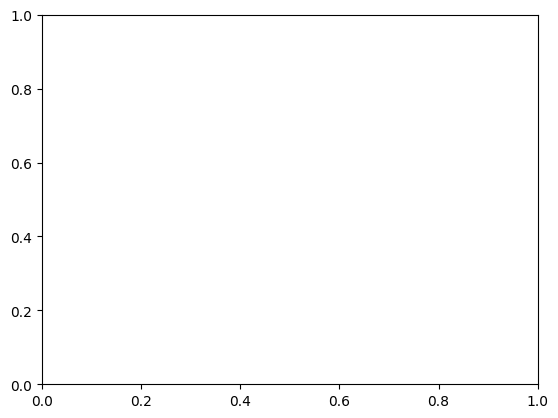

In [92]:
plt.scatter(subs_para_mean[:,:,:,0].flatten(),subs_grand_truth[:,:,:,0].flatten())
plt.plot([.0,.8], [.0,.8])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Learniging rate for Action condition')

Text(0.5, 1.0, 'Learniging rate for Action condition')

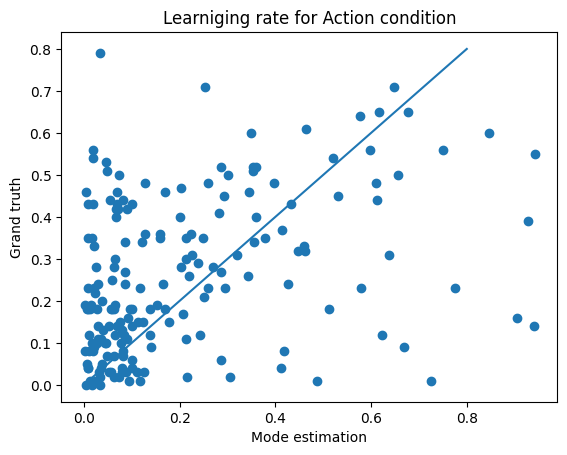

In [13]:
plt.scatter(subs_para_mode[:,:,:,0].flatten(),subs_grand_truth[:,:,:,0].flatten())
plt.plot([.0,.8], [.0,.8])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Learniging rate for Action condition')

Text(0.5, 1.0, 'Learniging rate for Action condition')

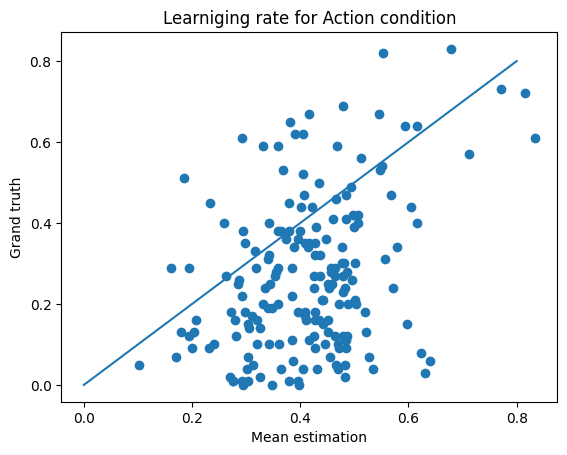

In [14]:
plt.scatter(subs_para_mean[:,:,:,1].flatten(),subs_grand_truth[:,:,:,1].flatten())
plt.plot([0,.8], [0,.8])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Learniging rate for Action condition')

Text(0.5, 1.0, 'Learniging rate for Action condition')

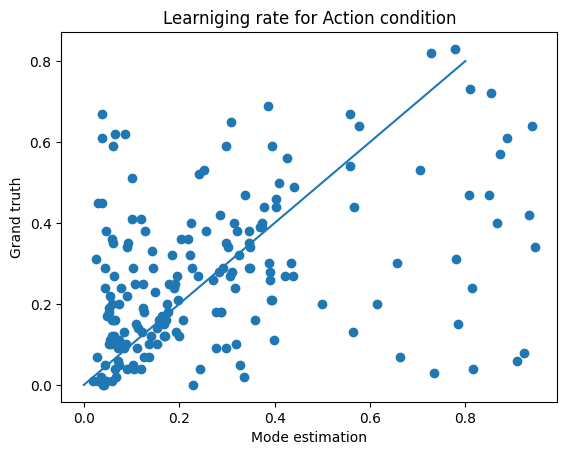

In [16]:
plt.scatter(subs_para_mode[:,:,:,1].flatten(),subs_grand_truth[:,:,:,1].flatten())
plt.plot([0,.8], [0,.8])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Learniging rate for Action condition')

Text(0.5, 1.0, 'Weighting')

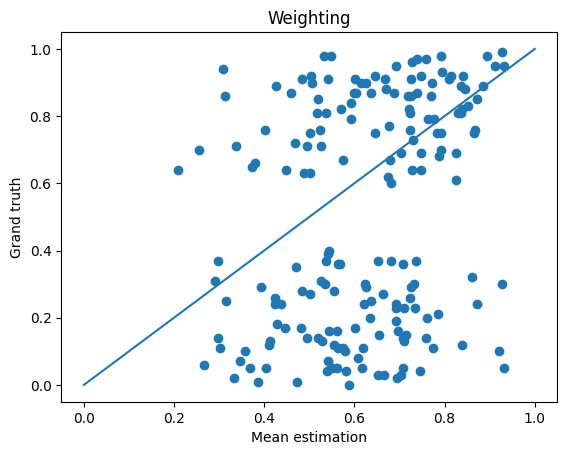

In [17]:
plt.scatter(subs_para_mean[:,:,:,2].flatten(),subs_grand_truth[:,:,:,2].flatten())
plt.plot([0,1], [0,1])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Weighting')

Text(0.5, 1.0, 'Weighting')

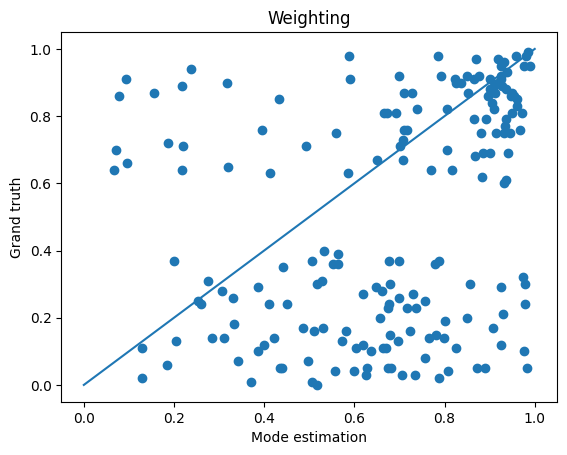

In [18]:
plt.scatter(subs_para_mode[:,:,:,2].flatten(),subs_grand_truth[:,:,:,2].flatten())
plt.plot([0,1], [0,1])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Weighting')

In [118]:
simNumber = 12
#parent_dir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/simulation/' # main Folder
parent_dir = '/mnt/scratch/projects/7TPD/amin/' # sractch folder
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']

# delcare a array for saving mean parameters
subs_para_mean = np.zeros([19, len(subList), 2, 2, 3])
# delcare a array for saving mode parameters
subs_para_mode = np.zeros([19, len(subList), 2, 2, 3])
# loop over list of participants
for run in range(2, 21):
    print(run)
    for i, subName in enumerate(subList):
        for session in [1, 2]: 
            pickelDir = parent_dir + str(simNumber) + '/' + subName + '/sess-' + str(session) + '_RL_condition_same_lr_run'+str(run)+'.pkl'
            """Loading the pickle file of model fit from the subject directory"""
            loadPkl = utils.load_pickle(load_path=pickelDir)
            fit = loadPkl['fit']   
            # mean of estimated paraemter  for Action condition
            subs_para_mean[run -2, i, 0, session-1] = np.array([fit['alpha'][0].mean(), fit['weightAct'][0].mean(), fit['sensitivity'][0].mean()])
            # mean of estimated paraemter  for Action condition
            subs_para_mean[run -2,i, 1, session-1] = np.array([fit['alpha'][1].mean(),  fit['weightAct'][1].mean(), fit['sensitivity'][1].mean()])
            # Mode of estimated paraemter  for Action and color Conditions
            subs_para_mode[run -2,i, 0, session-1] = np.array([find_mode_point(fit['alpha'][0]), find_mode_point(fit['weightAct'][0]), find_mode_point(fit['sensitivity'][0])])
            subs_para_mode[run -2,i, 1, session-1] = np.array([find_mode_point(fit['alpha'][1]), find_mode_point(fit['weightAct'][1]), find_mode_point(fit['sensitivity'][1])])


2


In [ ]:
# main directory
parent_dir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/simulation/' 
# the grand truth parameters
subs_grand_truth = np.zeros([len(subList), 2, 2, 3])
# loop over list of participants
for i, subName in enumerate(subList):
    for session in [1,2]:
        for cond, condition in enumerate(['Act', 'Stim']): 
            dirc = parent_dir + str(simNumber) + '/' + subName +'/' + subName + '-simulated-task-design-true-param.csv'
            simulated_data = pd.read_csv(dirc)
            simulated_data_chunck = simulated_data[(simulated_data['session'] == session) & (simulated_data['block'] == condition)]
            subs_grand_truth[i, cond, session-1] = np.array([simulated_data_chunck['alpha'].unique()[0],
                                                             simulated_data_chunck['weightAct'].unique()[0],
                                                             simulated_data_chunck['beta'].unique()[0]])

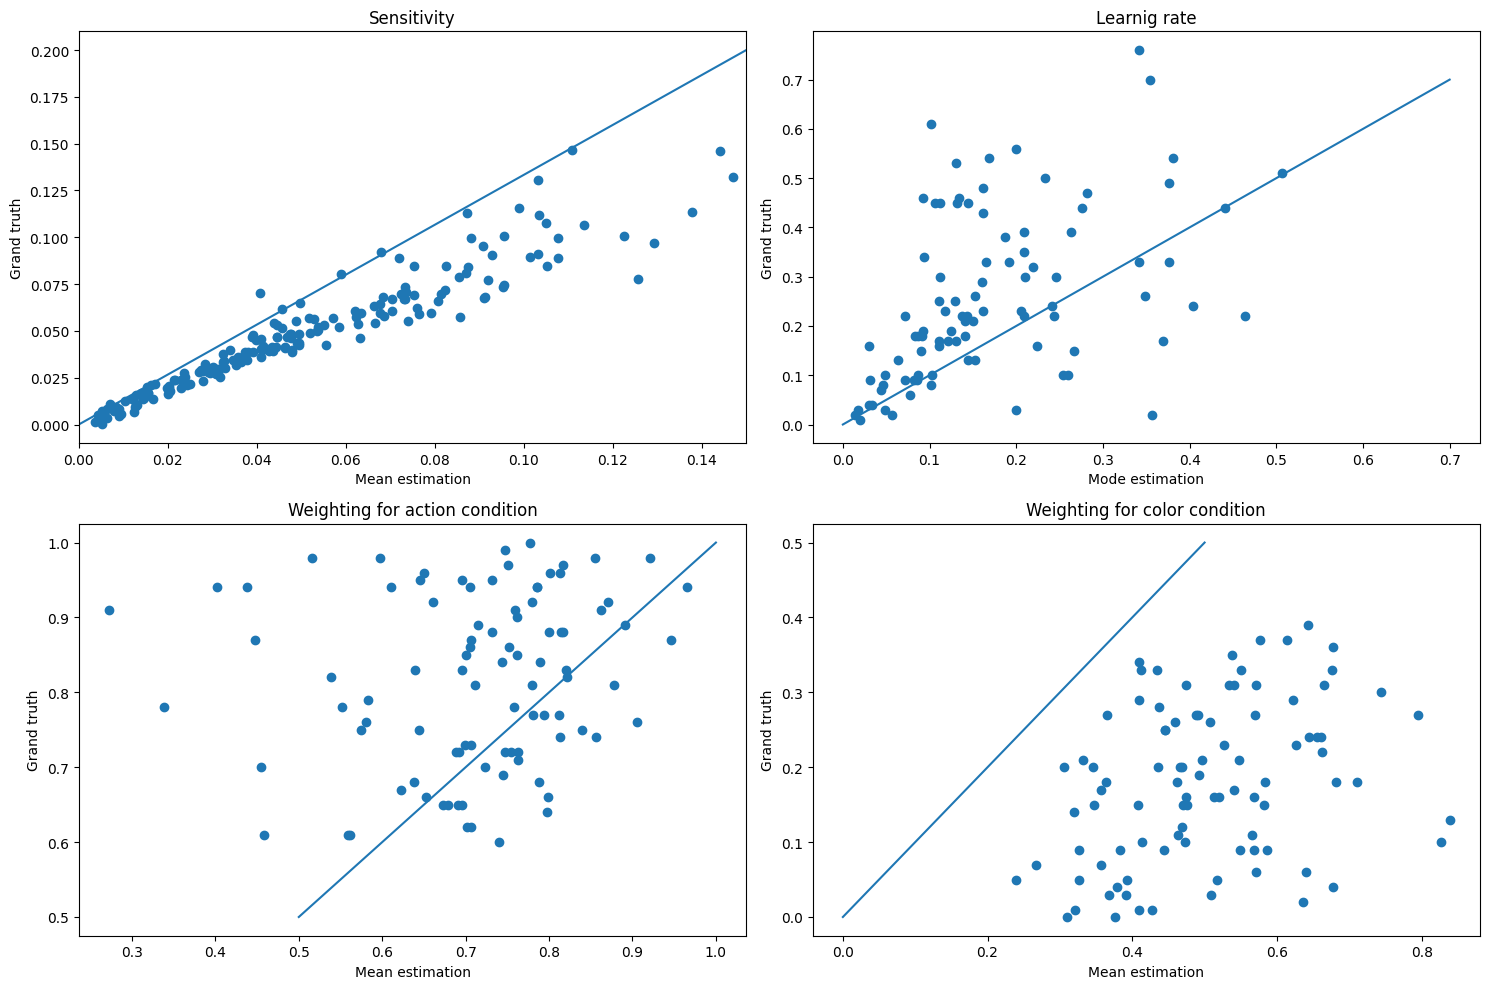

In [ ]:
fig = plt.figure(figsize=(15, 10), tight_layout=True)
rows = 2
columns =2 

# sensitivity
fig.add_subplot(rows, columns, 1)
plt.scatter(subs_para_mode_mean[:,:,:, 2].flatten(),subs_grand_truth[:,:,:, 2].flatten())
plt.plot([.0,.15], [.0,.2])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Sensitivity')
plt.xlim(0, .15)

# learning rate
fig.add_subplot(rows, columns, 2)
plt.scatter(subs_para_mode_mean[:,0,:, 0].flatten(),subs_grand_truth[:,0,:, 0].flatten())
plt.plot([.0,.7], [.0,.7])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Learnig rate')

# weighting
fig.add_subplot(rows, columns, 3)
plt.scatter(subs_para_mode_mean[:,0,:, 1].flatten(),subs_grand_truth[:,0,:, 1].flatten())
plt.plot([.5,1], [.5,1])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Weighting for action condition')

# weighting
fig.add_subplot(rows, columns, 4)
plt.scatter(subs_para_mode_mean[:,1,:, 1].flatten(),subs_grand_truth[:,1,:, 1].flatten())
plt.plot([0,.5], [0,.5])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Weighting for color condition')

# save figure
fig.savefig('/home/amingk/Documents/7TPD/figures/para_reco_RL_condition_same_lr.png', dpi=300)

In [ ]:
print('finish')

In [112]:
import os
os.getcwd()

'/home/amingk/Documents/7TPD/ActStimRL/Model/Checking'

(0.0, 0.15)

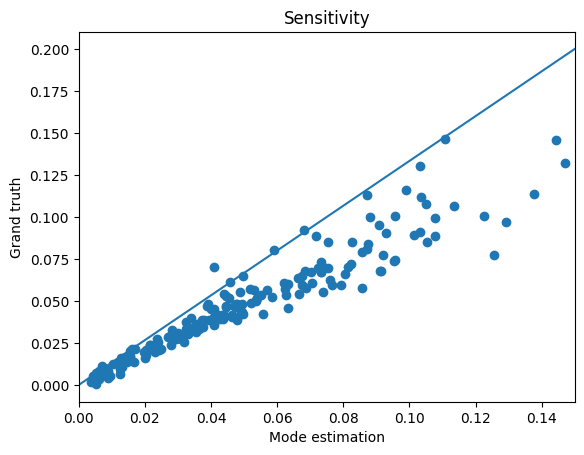

In [60]:
plt.scatter(subs_para_mode_mean[:,:,:, 2].flatten(),subs_grand_truth[:,:,:, 2].flatten())
plt.plot([.0,.15], [.0,.2])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Sensitivity')
plt.xlim(0, .15)

Text(0.5, 1.0, 'Learnig rate')

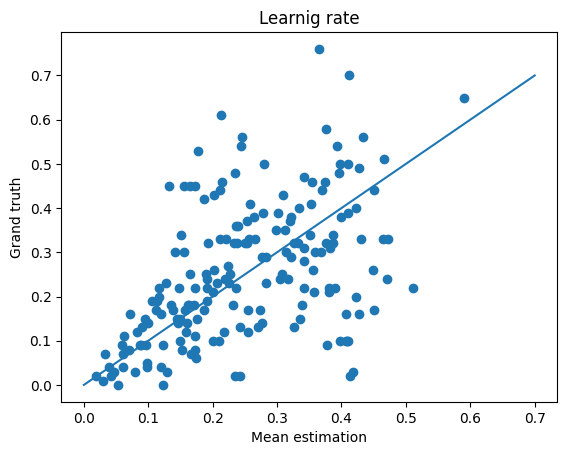

In [65]:
plt.scatter(subs_para_mean_mean[:,:,:, 0].flatten(),subs_grand_truth[:,:,:, 0].flatten())
plt.plot([.0,.7], [.0,.7])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Learnig rate')


Text(0.5, 1.0, 'Learnig rate')

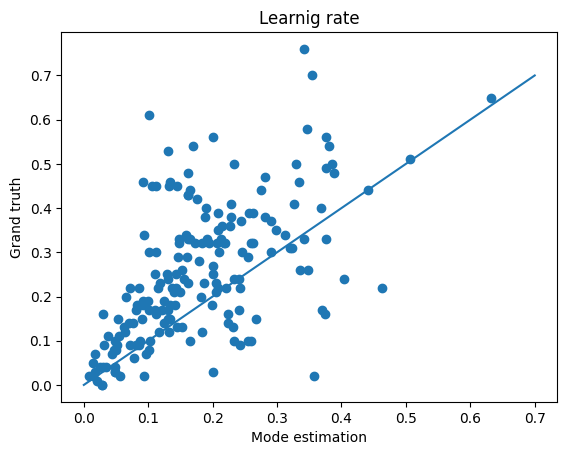

In [66]:
plt.scatter(subs_para_mode_mean[:,:,:, 0].flatten(),subs_grand_truth[:,:,:, 0].flatten())
plt.plot([.0,.7], [.0,.7])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Learnig rate')

Text(0.5, 1.0, 'Weighting')

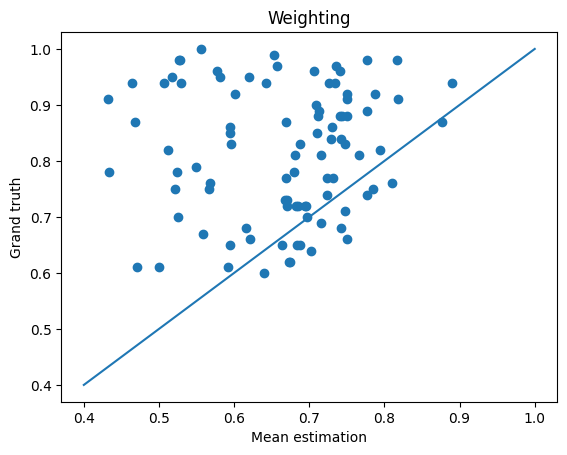

In [75]:
plt.scatter(subs_para_mean_mean[:,0,:, 1].flatten(),subs_grand_truth[:,0,:, 1].flatten())
plt.plot([.4,1], [.4,1])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Weighting')

Text(0.5, 1.0, 'Weighting')

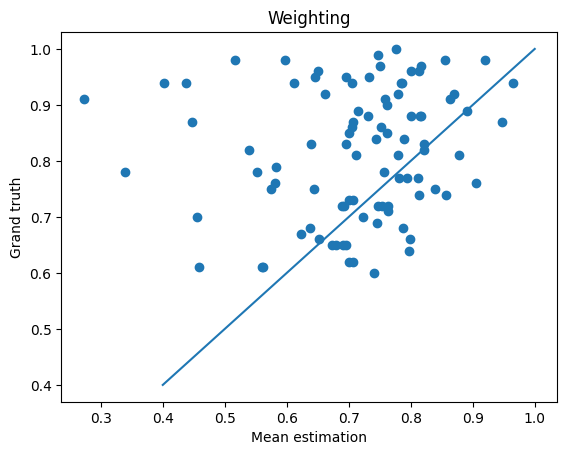

In [74]:
plt.scatter(subs_para_mode_mean[:,0,:, 1].flatten(),subs_grand_truth[:,0,:, 1].flatten())
plt.plot([.4,1], [.4,1])
plt.xlabel('Mean estimation')
plt.ylabel('Grand truth')
plt.title('Weighting')

Text(0.5, 1.0, 'Weighting')

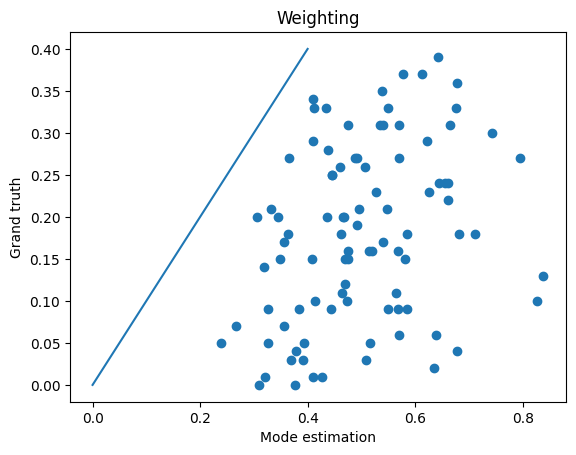

In [71]:
plt.scatter(subs_para_mode_mean[:,1,:, 1].flatten(),subs_grand_truth[:,1,:, 1].flatten())
plt.plot([0,.4], [0,.4])
plt.xlabel('Mode estimation')
plt.ylabel('Grand truth')
plt.title('Weighting')

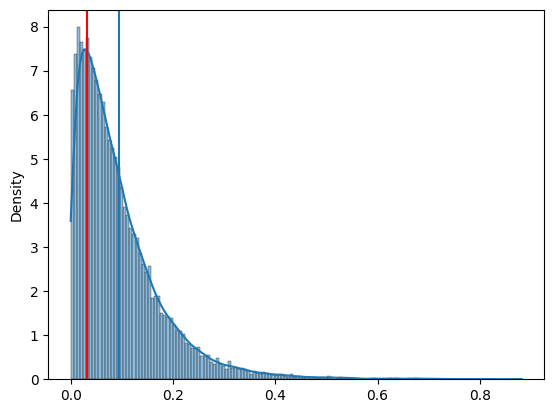

In [326]:
sns.histplot(data, stat='density', kde=True)
plt.axvline(x=mode_point, color='red')
plt.axvline(x=data.mean())